In [562]:
import numpy as np
import matplotlib.pyplot as plt
import modules.common_func as common
import importlib

importlib.reload(modules.common_func)

root = '/home/shail/work/UIC/snlp/predictor/Data/dialogs'
name1 = '/Adventure/indianajonesandtheraidersofthelostark_dialog.txt'
name2 = '/Mystery/afewgoodmen_dialog.txt'
h1 = 'INDY'
v1 = 'BELLOQ'
h2 = 'KAFFEE'
v2 = 'JESSEP'
pattern = "*.txt"

script1 = common.readFile(root + name1)
script2 = common.readFile(root + name2)

split_movie1 = common.cleanSplitScript(script1)
split_movie2 = common.cleanSplitScript(script2)

#print(script1)
#print(split_movie2)

In [563]:
import pandas as pd

project_root = '/home/shail/work/UIC/snlp/predictor/'
data = pd.read_csv(project_root + 'Data/labels.csv')
data

,char,movie,filename,label
0,INDY,Raiders of the Lost Ark,Data/dialogs/Adventure/indianajonesandtheraide...,1
1,CLARICE,The Silence of the Lambs,Data/dialogs/Thriller/silenceofthelambs_dialog...,1
2,ROCKY,Rocky,Data/dialogs/Drama/rocky_dialog.txt,1
3,RIPLEY,Aliens,Data/dialogs/Sci-Fi/aliens_dialog.txt,1
4,BAILEY,It's a Wonderful Life,Data/dialogs/Romance/itsawonderfullife_dialog.txt,1
5,TOM,The Grapes of Wrath,Data/dialogs/Drama/grapesofwraththe_dialog.txt,1
6,SCHINDLER,Schindler's List,Data/dialogs/War/schindlerslist_dialog.txt,1
7,HAN,Star Wars,Data/dialogs/Sci-Fi/starwarstheempirestrikesba...,1
8,GANDHI,Gandhi,Data/dialogs/Drama/gandhi_dialog.txt,1
9,LOUISE,Thelma & Louise,Data/dialogs/Thriller/thelmalouise_dialog.txt,1


In [564]:
# data['script'] = common.readFile(project_root + df['filename'])
data['dialogs'] = data.apply (lambda row: common.cleanSplitScript(common.readFile(project_root + row['filename'])), axis=1)

dialogs = []
for index, row in data.iterrows():
    scene_group = common.catScenes(row['dialogs'])
    scene_proc = common.catSceneDialogs(scene_group)
    scene_flat = common.flatProcSceneDialogs(scene_proc)
    mchar = common.getCharDialog(scene_flat, row['char'])
    dialogs.append(common.concatDFColumn(mchar, 'dialogue'))

data['dialogs'] = dialogs

In [458]:
scene_proc1 = common.catSceneDialogs(scene_groups1)
scene_proc2 = common.catSceneDialogs(scene_groups2)

In [16]:
data1 = common.flatProcSceneDialogs(scene_proc1)
data2 = common.flatProcSceneDialogs(scene_proc2)

In [457]:
m1char1 = common.getCharDialog(data1, h1)
m1char2 = common.getCharDialog(data1, v1)
m2char1 = common.getCharDialog(data2, h2)
m2char2 = common.getCharDialog(data2, v2)

In [456]:
dia_h1 = common.concatDFColumn(m1char1, 'dialogue')
dia_v1 = common.concatDFColumn(m1char2, 'dialogue')
dia_h2 = common.concatDFColumn(m2char1, 'dialogue')
dia_v2 = common.concatDFColumn(m2char2, 'dialogue')

In [623]:
from modules.bag_o_words import getBagOfWords

bag_h1 = getBagOfWords(dia_h1)
bag_v1 = getBagOfWords(dia_v1)
bag_h2 = getBagOfWords(dia_h2)
bag_v2 = getBagOfWords(dia_v2)

bag_h1

[['the', 99],
 ['i', 79],
 ['you', 61],
 ['to', 53],
 ['it', 47],
 ['that', 37],
 ['s', 37],
 ['a', 37],
 ['of', 36],
 ['t', 33],
 ['in', 26],
 ['what', 24],
 ['be', 23],
 ['get', 21],
 ['we', 20],
 ['don', 18],
 ['and', 17],
 ['ll', 16],
 ['here', 16],
 ['they', 15],
 ['ark', 14],
 ['this', 12],
 ['is', 12],
 ['do', 12],
 ['can', 12],
 ['out', 12],
 ['on', 12],
 ['your', 12],
 ['have', 11],
 ['m', 11],
 ['for', 11],
 ['where', 10],
 ['he', 10],
 ['was', 10],
 ['had', 10],
 ['back', 10],
 ['now', 10],
 ['me', 10],
 ['re', 10],
 ['go', 9],
 ['know', 9],
 ['like', 9],
 ['belloq', 9],
 ['going', 9],
 ['all', 9],
 ['time', 9],
 ['about', 9],
 ['at', 9],
 ['got', 8],
 ['let', 8],
 ['want', 8],
 ['look', 8],
 ['down', 8],
 ['are', 8],
 ['marion', 8],
 ['no', 7],
 ['if', 7],
 ['would', 7],
 ['there', 7],
 ['just', 7],
 ['staff', 7],
 ['why', 7],
 ['come', 7],
 ['up', 7],
 ['did', 7],
 ['ve', 6],
 ['not', 6],
 ['then', 6],
 ['when', 6],
 ['them', 5],
 ['us', 5],
 ['good', 5],
 ['one', 5],
 ['b

In [ ]:
from modules.bag_o_words import getBagOfWords

emp_X = []
emp_y = []
vocab = []
for index, row in data.iterrows():
    emp = getBagOfWords(row['dialogs'])
    emp_X.append([i[1] for i in emp])
    emp_y.append(row['label'])


emp_x_df = pd.DataFrame(X)
emp_y_df = pd.DataFrame(y)

In [625]:
from modules.lin_enquiry import getEmpathAnalysis

emp_X = []
emp_y = []
for index, row in data.iterrows():
    emp = getEmpathAnalysis(row['dialogs'])
    emp_X.append([i[1] for i in emp])
    emp_y.append(row['label'])


emp_x_df = pd.DataFrame(emp_X)
emp_y_df = pd.DataFrame(emp_y)

#### Empath SVM

In [626]:
from sklearn import svm
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score
# from sklearn.model_selection import KFold

clf = svm.SVC()

# Leave one out cross validations
# loo = LeaveOneOut()
# loo.get_n_splits(X)
# scores = cross_val_score(clf, emp_x_df, emp_y_df.values.ravel(), cv=loo)
# print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))


scores = cross_val_score(clf, emp_x_df, emp_y_df.values.ravel(), cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

# Train-test split. No cross-validation
# X_train, X_test, y_train, y_test = train_test_split(emp_x_df, emp_y_df, test_size=0.2, random_state=5)
# clf.fit(X, y)
# clf.score(X_test, y_test)

Accuracy: 55.667% (5.972%)


In [627]:
from sklearn.metrics import r2_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(clf, emp_x_df, emp_y_df.values.ravel(), cv=10)
r2_score(emp_y_df, y_pred)


-0.79166666666666652

#### Empath Random Forest

In [628]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

rf_clf = RandomForestClassifier(n_jobs=2)
# rf_clf.fit(X, y)

scores = cross_val_score(rf_clf, emp_x_df, emp_y_df.values.ravel(), cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Accuracy: 58.167% (16.389%)


In [630]:
from sklearn.metrics import r2_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(rf_clf, emp_x_df, emp_y_df.values.ravel(), cv=10)
r2_score(emp_test_df, y_pred)


-0.36732456140350855

In [681]:
from modules.emo_analysis import getSentAnalysis

emo_aggr = []
emo_X = []
emo_y = []
for index, row in data.iterrows():
    emo = getSentAnalysis(row['dialogs'])
    emo_X.append([i[1] for i in emo])
    emo_y.append(row['label'])
    emo_aggr.append(emo)


emo_x_df = pd.DataFrame(emo_X)
emo_y_df = pd.DataFrame(emo_y)


          anger   disgust      fear       joy   sadness
label                                                  
0      0.263966  0.120062  0.204035  0.530943  0.429682
1      0.336093  0.093142  0.191261  0.542436  0.428851


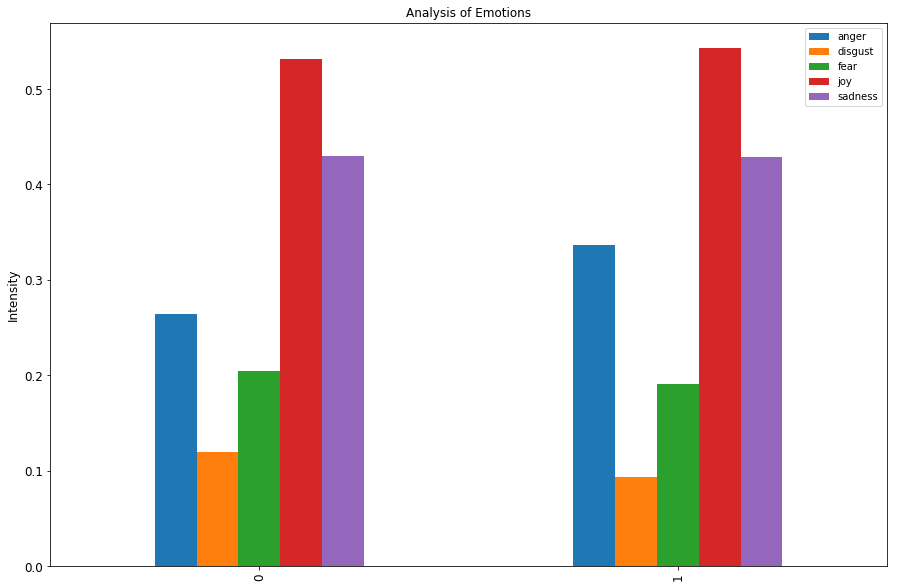

In [710]:
import matplotlib.pyplot as plt

emo_dict = [dict(x) for x in emo_aggr]
emo_df = pd.DataFrame(emo_dict)
emo_df['label'] = emo_y_df
emo_grouped = emo_df.groupby('label')['anger', 'disgust', 'fear', 'joy', 'sadness'].mean()
print(emo_grouped)

ax = emo_grouped.plot(kind='bar', title ="Analysis of Emotions", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Intensity", fontsize=12)
plt.show()

#### Emotions SVM

In [632]:
from sklearn import svm
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score
# from sklearn.model_selection import KFold

clf = svm.SVC()

# Leave one out cross validations
# loo = LeaveOneOut()
# loo.get_n_splits(X)
# scores = cross_val_score(clf, emo_train_df, emo_test_df.values.ravel(), cv=loo)
# print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))


scores = cross_val_score(clf, emo_x_df, emo_y_df.values.ravel(), cv=8)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

# Train-test split. No cross-validation
# X_train, X_test, y_train, y_test = train_test_split(emp_train_df, emp_test_df, test_size=0.2, random_state=5)
# clf.fit(X, y)
# clf.score(X_test, y_test)

Accuracy: 56.250% (4.841%)


In [633]:
from sklearn.metrics import r2_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(clf, emo_x_df, emo_y_df.values.ravel(), cv=10)
r2_score(emo_test_df, y_pred)


-0.013706140350877138

#### Emotions Random Forest

In [634]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

rf_clf = RandomForestClassifier(n_jobs=2)
# rf_clf.fit(X, y)

scores = cross_val_score(rf_clf, emo_x_df, emo_y_df.values.ravel(), cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Accuracy: 56.500% (22.699%)


In [635]:
from sklearn.metrics import r2_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(rf_clf, emo_x_df, emo_y_df.values.ravel(), cv=10)
r2_score(emo_y_df, y_pred)


-0.98026315789473673

In [ ]:
import gensim
import os
importlib.reload(modules.w2v)
from modules.w2v import modelW2V

w2v_loc = "/home/shail/work/UIC/snlp/predictor/Data/word2vec"


# Training Word2Vec : Watchout! Don't run unless needed

In [ ]:
data_loc = '/home/shail/work/UIC/snlp/predictor/Data/dialogs'

model = modelW2V(w2v_loc, data_loc)

### End of Watchout

In [134]:
if 'model' not in locals() or 'model' not in globals():
    model = gensim.models.Word2Vec.load(word2vec_loc)

word_vectors = model.wv.syn0
n_words = word_vectors.shape[0]
vec_size = word_vectors.shape[1]
print("#words = {0}, vector size = {1}".format(n_words, vec_size))

#words = 58485, vector size = 100


In [771]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
idx = kmeans.fit_predict(word_vectors)

word_centroid_list = list(zip(model.wv.index2word, idx))
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=True)
pd.DataFrame(word_centroid_list_sort).groupby(1).apply(lambda x: ' '.join(x[0]))[145]

'cat bird soldier magic wolf priest dragon beast thief doll plain mouse smells chick toy fighter golden guardians broad bull devils shark stunt demon cookie parade pet wrestling nun fever rabbit tiger bears dancer burger rap goat madman buff phrase messenger poster deer goose chevy geek grunt postcard burglar teenager abbotts deuce thai sap fashioned gigantic sporting pup vendor'

In [655]:
from modules.w2v import doc2ClusterVec

w2v_X = []
w2v_y = []
for index, row in data.iterrows():
    w2v = doc2ClusterVec(row['dialogs'], kmeans, model)
    w2v_X.append(w2v)
    w2v_y.append(row['label'])


w2v_x_df = pd.DataFrame(w2v_X)
w2v_y_df = pd.DataFrame(w2v_y)

#### Word2Vec SVM

In [652]:
from sklearn import svm
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score
# from sklearn.model_selection import KFold

clf = svm.SVC()

# Leave one out cross validations
# loo = LeaveOneOut()
# loo.get_n_splits(X)
# scores = cross_val_score(clf, emo_train_df, emo_test_df.values.ravel(), cv=loo)
# print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))


scores = cross_val_score(clf, w2v_x_df, w2v_y_df.values.ravel(), cv=8)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

# Train-test split. No cross-validation
# X_train, X_test, y_train, y_test = train_test_split(emp_train_df, emp_test_df, test_size=0.2, random_state=5)
# clf.fit(X, y)
# clf.score(X_test, y_test)

Accuracy: 56.250% (4.841%)


In [654]:
from sklearn.metrics import r2_score, f1_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(clf, w2v_x_df, w2v_y_df.values.ravel(), cv=8)
r2_score(w2v_y_df, y_pred)
f1_score(w2v_y_df, y_pred)


/home/shail/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Word2Vec Random Forest

In [641]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

rf_clf = RandomForestClassifier(n_jobs=2)
# rf_clf.fit(X, y)

scores = cross_val_score(rf_clf, w2v_x_df, w2v_y_df.values.ravel(), cv=8)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Accuracy: 56.250% (4.841%)


In [657]:
from sklearn.metrics import r2_score, f1_score

#y_pred = clf.predict(X_test)

y_pred = cross_val_predict(rf_clf, w2v_x_df, w2v_y_df.values.ravel(), cv=8)
r2_score(w2v_y_df, y_pred)
f1_score(w2v_y_df, y_pred)

0.45714285714285713